In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

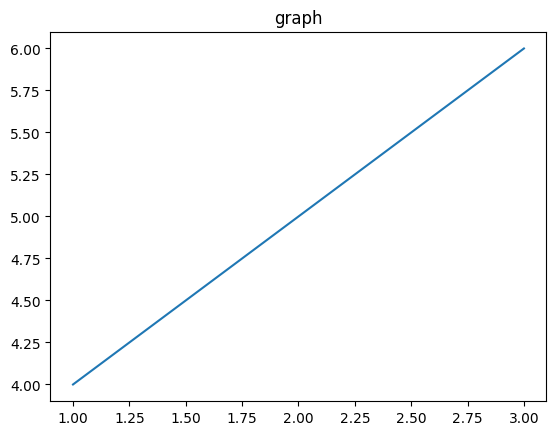

In [2]:
plt.plot([1,2,3],[4,5,6])
plt.title('graph')
plt.show()

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [6]:
# 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
# 폰트지정하기
plt.rcParams['font.family'] = 'NanumGothic'
#appleGothic (mac os)

In [8]:
# 폰트 확인하기
[f.name for f in fm.fontManager.ttflist if 'Nanum' in  f.name]

['NanumSquare',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'Nanum Pen Script',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunGothic']

In [9]:
[f.name for f in fm.fontManager.ttflist if 'Malgun' in  f.name]

['Malgun Gothic', 'Malgun Gothic', 'Malgun Gothic']

In [13]:
# 데이터 불러오기
raw = pd.read_csv('csv/서울시 코로나19 확진자 현황.csv')

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_21548\3894158831.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('csv/서울시 코로나19 확진자 현황.csv')


In [14]:
df = raw.copy()

In [15]:
df.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [18]:
df.drop(columns=['환자번호', '국적', '환자정보','이동경로', '등록일', '수정일', '노출여부'])

,연번,확진일,지역,여행력,접촉력,조치사항,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,NaN,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,NaN,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,NaN,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,NaN,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,NaN,-
...,...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,NaN,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,NaN,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,NaN,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,NaN,퇴원


In [21]:
# 자료형 확인
df.dtypes

연번        int64
확진일      object
환자번호    float64
국적      float64
환자정보    float64
지역       object
여행력      object
접촉력      object
조치사항    float64
상태       object
이동경로     object
등록일      object
수정일      object
노출여부     object
dtype: object

In [22]:
# 확진일 >> datetime
df['확진일'] = pd.to_datetime(df['확진일'])

In [25]:
# '지역' 공백 제거
print(df['지역'].nunique())
print(df['지역'].unique())

29
['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구' '타시도 ' ' 성북구']


In [30]:
# 문자 양쪽 공백 제거 >> 업데이트
df['지역'] = df['지역'].str.strip()
print(df['지역'].nunique())
print(df['지역'].unique())

27
['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구']


In [37]:
df['지역'] = df['지역'].astype('category')
print(df.dtypes)
print(df.info())

연번               int64
확진일     datetime64[ns]
환자번호           float64
국적             float64
환자정보           float64
지역            category
여행력             object
접촉력             object
조치사항           float64
상태              object
이동경로            object
등록일             object
수정일             object
노출여부            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   환자번호    0 non-null      float64       
 3   국적      0 non-null      float64       
 4   환자정보    0 non-null      float64       
 5   지역      99550 non-null  category      
 6   여행력     1717 non-null   object        
 7   접촉력     99550 non-null  object        
 8   조치사항    0 non-null      float64       
 9   상태      99550 non-null  object        
 10  이동경로    10000 non-null

In [35]:
# 결측치 분석
df.isnull().sum()

연번          0
확진일         0
환자번호    99550
국적      99550
환자정보    99550
지역          0
여행력     97833
접촉력         0
조치사항    99550
상태          0
이동경로    89550
등록일         0
수정일         0
노출여부        0
dtype: int64

In [39]:
# 구 별 확진자 동향
# 확진일-구별 확진자 수 집계

#피봇 테이블 만들기
df_gu = pd.pivot_table(df, index='확진일',
               columns='지역',
               values='연번',
               aggfunc='count',
               margins=True)

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_21548\920526386.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_gu = pd.pivot_table(df, index='확진일',


In [44]:
# df_gu.head()
# 서울시 일별 추가 확진자 동향

print(df_gu['All'])

확진일
2020-01-24 00:00:00        1
2020-01-30 00:00:00        3
2020-01-31 00:00:00        3
2020-02-02 00:00:00        1
2020-02-05 00:00:00        2
                       ...  
2021-09-25 00:00:00      928
2021-09-26 00:00:00      778
2021-09-27 00:00:00      842
2021-09-28 00:00:00     1054
All                    99550
Name: All, Length: 583, dtype: int64


In [48]:
df_gu['All'][:-1]
s_date = df_gu['All'][:-1]

In [51]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending=False)  # 많았던 순서니까 False

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

In [52]:
# 서울시 일별 추가 확진자 시각화
x = s_date.index  # 일자
y = s_date.values # 확진자 수

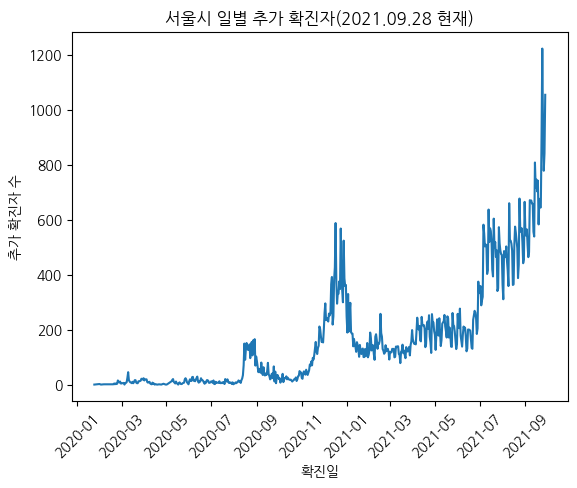

In [55]:
plt.plot(x,y)
plt.title('서울시 일별 추가 확진자(2021.09.28 현재)')
plt.xlabel('확진일')
plt.ylabel('추가 확진자 수')
plt.xticks(rotation=45)
plt.show()

In [57]:
df_gu.loc['All']

지역
강남구      6926
강동구      3782
강북구      2606
강서구      4447
관악구      5418
광진구      3486
구로구      4168
금천구      2064
기타       2321
노원구      3932
도봉구      2605
동대문구     3487
동작구      4120
마포구      3726
서대문구     2692
서초구      4284
성동구      2839
성북구      3779
송파구      6356
양천구      3291
영등포구     4463
용산구      2705
은평구      4284
종로구      1617
중구       1708
중랑구      3729
타시도      4715
All     99550
Name: All, dtype: int64

In [60]:
# 서울시 구별 누적확진자 비교
df_gu.loc['All'][:-1]

지역
강남구     6926
강동구     3782
강북구     2606
강서구     4447
관악구     5418
광진구     3486
구로구     4168
금천구     2064
기타      2321
노원구     3932
도봉구     2605
동대문구    3487
동작구     4120
마포구     3726
서대문구    2692
서초구     4284
성동구     2839
성북구     3779
송파구     6356
양천구     3291
영등포구    4463
용산구     2705
은평구     4284
종로구     1617
중구      1708
중랑구     3729
타시도     4715
Name: All, dtype: int64

In [64]:
# 서울시 구별 누적확진자 비교
s_gu = df_gu.loc['All'][:-1]

In [65]:
# 누적 확진자 수 많은 순으로 보기
s_gu = s_gu.sort_values(ascending=False)

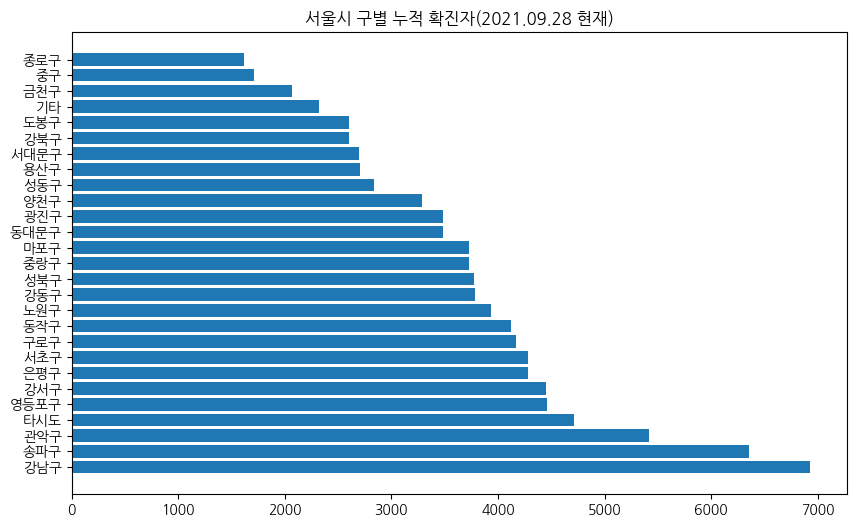

In [67]:
x = s_gu.index  # 서울시 구
y = s_gu.values # 누적 확진자 수

plt.figure(figsize=(10,6))
plt.title('서울시 구별 누적 확진자(2021.09.28 현재)', size=12)
plt.barh(x,y) # 가로막대 그래프
plt.show()

In [73]:
# 최근일 기준, 지역별 추가 확진자
df_gu.iloc[-2]
# 데이터프레임에서 뒤에서 두 번째 행 선택
df_gu.iloc[-2][:-1] # 선택한 행에서 마지막 열 제외

지역
강남구     45
강동구     51
강북구     25
강서구     41
관악구     48
광진구     36
구로구     55
금천구     31
기타      65
노원구     29
도봉구     35
동대문구    66
동작구     28
마포구     47
서대문구    30
서초구     19
성동구     24
성북구     41
송파구     68
양천구     27
영등포구    43
용산구     24
은평구     47
종로구     23
중구      37
중랑구     26
타시도     43
Name: 2021-09-28 00:00:00, dtype: int64

In [79]:
s_gu = df_gu.iloc[-2][:-1]
s_gu = s_gu.sort_values(ascending=False)

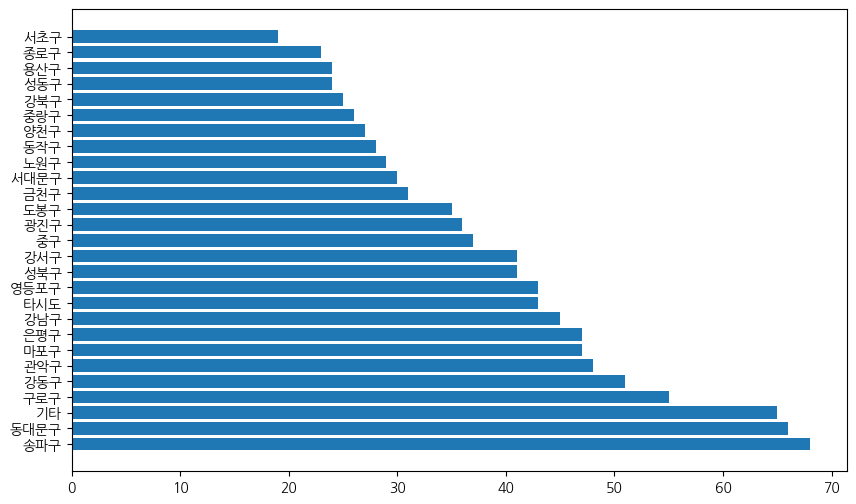

In [80]:
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(10,6))
plt.barh(x,y)
plt.show()

In [87]:
# 접촉력에 따른 확진 분석
df['접촉력']
df['접촉력'].value_counts()[:10].to_frame()  # to_frame()을 하면 데이터프레임 형태로 나옴.

,count
접촉력,
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277


In [91]:
# 최근 월 접촉력에 따른 확진 건수 베스트 10 선정
# 2021-09
df['확진일']

0       2021-09-28
1       2021-09-28
2       2021-09-28
3       2021-09-28
4       2021-09-28
           ...    
99545   2020-01-31
99546   2020-01-30
99547   2020-01-30
99548   2020-01-30
99549   2020-01-24
Name: 확진일, Length: 99550, dtype: datetime64[ns]

In [92]:

df['확진일']

condition = (df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)  # 위에서 상위 10개가 2021 09 니까
df[condition]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19529,80021,2021-09-01,NaN,NaN,NaN,동작구,NaN,감염경로 조사중,NaN,퇴원,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
19530,80020,2021-09-01,NaN,NaN,NaN,중랑구,NaN,감염경로 조사중,NaN,퇴원,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
19531,80019,2021-09-01,NaN,NaN,NaN,동작구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
19532,80018,2021-09-01,NaN,NaN,NaN,중랑구,NaN,감염경로 조사중,NaN,퇴원,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


In [98]:
condition = (df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)
df[condition]['접촉력'].value_counts()[:10].to_frame() # 접촉력만 보고 싶으니까. 10번째만 뽑는다.

,count
접촉력,
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
